In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
url='http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
names = ['Age', 'Sex', 'Chestpaintype','Rest_BP', 'Cholesterol', 'Fasting_sugar', 'Rest_ECG', 'Max_heartrate', 'Ex_Ind_Angina', 'STDepr_Ind_Ex', 'Sl_Pk_Ex', 'No_Vessels', 'Thal', 'Heart_Dis' ]
dataset = pd.read_csv(url, names=names)  

In [3]:
dataset.shape

(303, 14)

Hippocrates: 'Let food be thy medicine and medicine be thy food.'

sex (1 = male; 0 = female), 
chest pain type 
    -- Value 1: typical angina 
    -- Value 2: atypical angina 
    -- Value 3: non-anginal pain 
    -- Value 4: asymptomatic
fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
restecg: resting electrocardiographic results 
    -- Value 0: normal 
    -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) 
    -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
exercise induced angina (1 = yes; 0 = no) 
slope: the slope of the peak exercise ST segment 
    -- Value 1: upsloping 
    -- Value 2: flat 
    -- Value 3: downsloping 
number of major vessels (0-3) colored by flouroscopy
thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
num: diagnosis of heart disease (angiographic disease status) 
    -- Value 0: < 50% diameter narrowing 
    -- Value 1: > 50% diameter narrowing 
The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4. Experiments with the Cleveland database have concentrated on simply attempting to distinguish presence (values 1,2,3,4) from absence (value 0). 

In [4]:
dataset.head()

,Age,Sex,Chestpaintype,Rest_BP,Cholesterol,Fasting_sugar,Rest_ECG,Max_heartrate,Ex_Ind_Angina,Depr_Ind_Ex,Sl_Pk_Ex,No_Vessels,Thal,Heart_Dis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
dataset['Heart_Dis'].replace(2, 1,inplace=True)
dataset['Heart_Dis'].replace(3, 1,inplace=True)
dataset['Heart_Dis'].replace(4, 1,inplace=True)
dataset['Chestpaintype'].replace(2, 1,inplace=True)
dataset['Chestpaintype'].replace(3, 0,inplace=True)
dataset['Chestpaintype'].replace(4, 0,inplace=True)

In [6]:
dataset.head()

,Age,Sex,Chestpaintype,Rest_BP,Cholesterol,Fasting_sugar,Rest_ECG,Max_heartrate,Ex_Ind_Angina,Depr_Ind_Ex,Sl_Pk_Ex,No_Vessels,Thal,Heart_Dis
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,0.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,0.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,0.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,1.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [10]:
print(dataset.dtypes)

Age              float64
Sex              float64
Chestpaintype    float64
Rest_BP          float64
Cholesterol      float64
Fasting_sugar    float64
Rest_ECG         float64
Max_heartrate    float64
Ex_Ind_Angina    float64
Depr_Ind_Ex      float64
Sl_Pk_Ex         float64
No_Vessels        object
Thal              object
Heart_Dis          int64
dtype: object


In [44]:
# 'No-Vessels' and 'Thal' columns have missing '?' values
dataset=dataset.replace('?', np.NaN)

In [45]:
print(dataset.dtypes)

Age              float64
Sex              float64
Chestpaintype    float64
Rest_BP          float64
Cholesterol      float64
Fasting_sugar    float64
Rest_ECG         float64
Max_heartrate    float64
Ex_Ind_Angina    float64
Depr_Ind_Ex      float64
Sl_Pk_Ex         float64
No_Vessels       float64
Thal             float64
Heart_Dis          int64
dtype: object


In [42]:
# Convert 'No_Vessels' and 'Thal' columns object to numeric
# dataset['No_Vessels'] = pd.to_numeric(dataset['No_Vessels'], errors='coerce')
# dataset['Thal'] = pd.to_numeric(dataset['Thal'], errors='coerce')

In [43]:
#print(dataset.dtypes)

Age              float64
Sex              float64
Chestpaintype    float64
Rest_BP          float64
Cholesterol      float64
Fasting_sugar    float64
Rest_ECG         float64
Max_heartrate    float64
Ex_Ind_Angina    float64
Depr_Ind_Ex      float64
Sl_Pk_Ex         float64
No_Vessels       float64
Thal             float64
Heart_Dis          int64
dtype: object


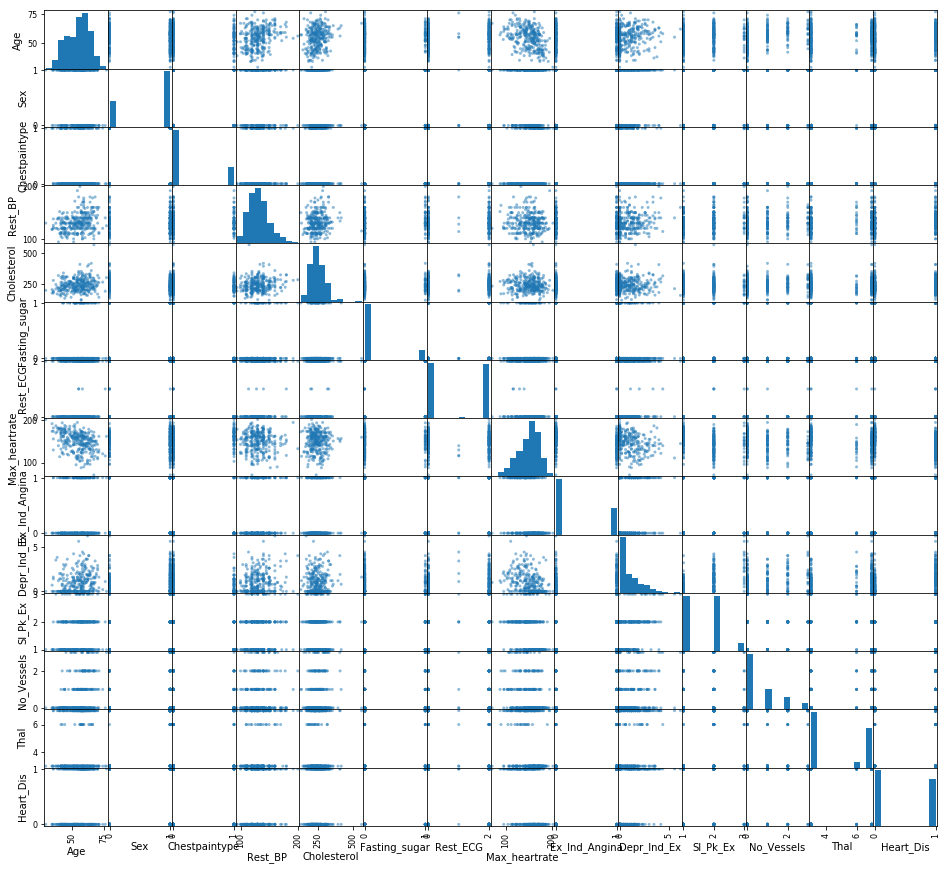

In [46]:
# scatter plot matrix
plt.rcParams["figure.figsize"] = (16,15)
scatter_matrix(dataset)
plt.show()

In [48]:
X = dataset.iloc[:, :-3].values  
y = dataset.iloc[:, 13].values  

In [49]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [50]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
y_pred = regressor.predict(X_test)  

In [55]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
# df  

In [51]:
import scipy
import sklearn
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
validation_size = 0.20
seed=7
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y,test_size=validation_size, random_state=seed)
scoring = 'accuracy'

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.751000 (0.084683)
LDA: 0.746833 (0.081495)
KNN: 0.603833 (0.089620)
CART: 0.661000 (0.092602)
NB: 0.767667 (0.078695)
SVM: 0.549667 (0.091490)


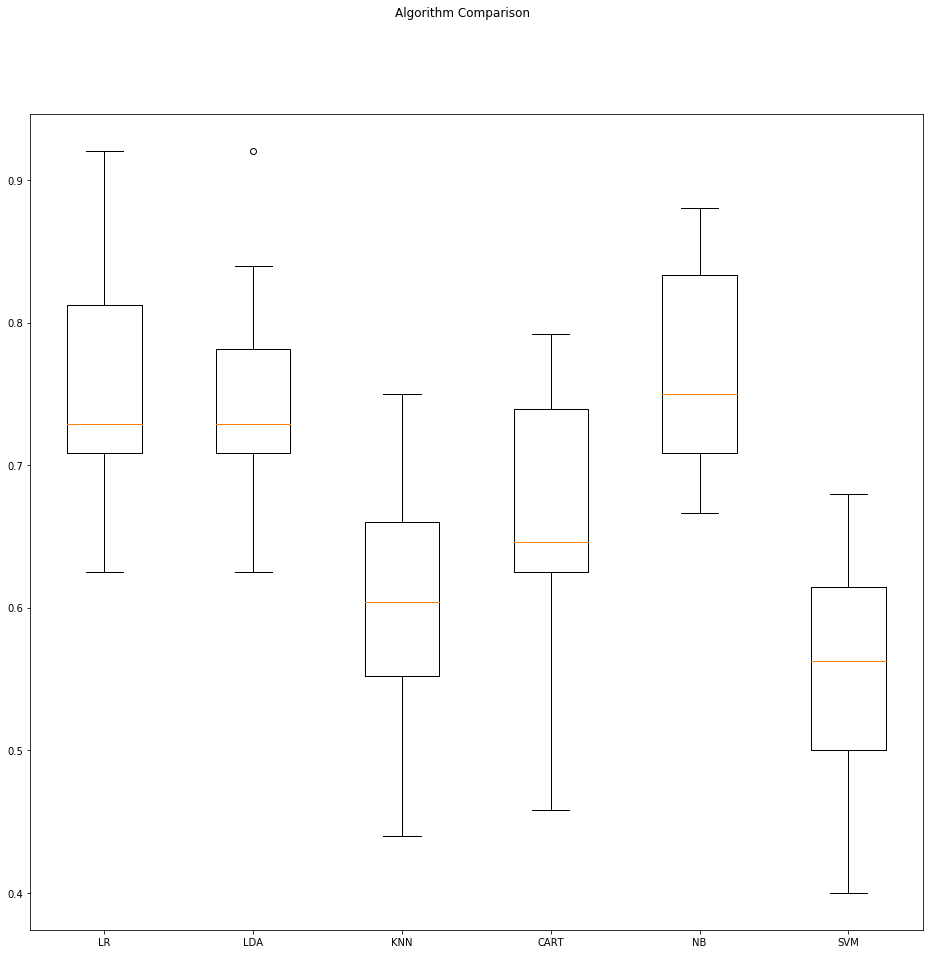

In [52]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [53]:
# Make predictions using Gaussian on validation dataset
nb = GaussianNB()
nb.fit(X_train, y_train)
predictions = nb.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.786885245902
[[24  5]
 [ 8 24]]
             precision    recall  f1-score   support

          0       0.75      0.83      0.79        29
          1       0.83      0.75      0.79        32

avg / total       0.79      0.79      0.79        61



In [54]:
# Make predictions using Logistic Regression on validation dataset
lr = LogisticRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_validation)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.770491803279
[[24  5]
 [ 9 23]]
             precision    recall  f1-score   support

          0       0.73      0.83      0.77        29
          1       0.82      0.72      0.77        32

avg / total       0.78      0.77      0.77        61

